In [1]:
import numpy as np
import matplotlib.pyplot as plt
import convex_hull as MyHull
from scipy.spatial import ConvexHull
import test
from sklearn.datasets import make_blobs

In [2]:
test.test()

All test are passed!


In [4]:
points, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=0)
hull_points = MyHull.convex_hull(points)
scipy_hull = ConvexHull(points)
scipy_hull_points = points[scipy_hull.vertices]

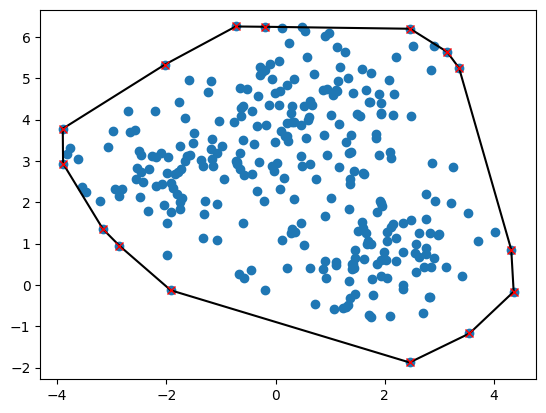

In [5]:
# input points
plt.plot(points[:,0], points[:,1], 'o')

# scipy convex hull visualization
for i in scipy_hull.simplices:
    plt.plot(points[i, 0], points[i, 1], 'k-')

# mark the points on my convex hull with a red cross
for point in hull_points:
    plt.plot(point[0], point[1], 'rx')


In [2]:
import cppyy

file = open("./cpp/convex_hull.h","r")
cpp_code = file.read()
cppyy.cppdef(cpp_code)

from cppyy.gbl import Point
from cppyy.gbl import ConvexHull as ConvexHullCpp
from cppyy.gbl.std import vector

def vec_to_array(vector):
  return np.array([[point.x, point.y] for point in vector])

def convex_hull_cpp(points):
  points_vec = vector[Point]()
  points_vec += [Point(x, y) for [x, y] in points]
  hull = ConvexHullCpp(points_vec)
  return vec_to_array(hull.hull)